In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
ls

drive/  sample_data/


In [3]:
cd /content/drive/MyDrive/ASSIGMENT-3 CNN

/content/drive/MyDrive/ASSIGMENT-3 CNN


In [4]:
pwd

'/content/drive/MyDrive/ASSIGMENT-3 CNN'

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale= 1./255,horizontal_flip = True,vertical_flip = True,zoom_range = 0.2) 


In [10]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [11]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/ASSIGMENT-3 CNN/flowers",target_size = (64,64),  class_mode = "categorical",batch_size = 24) 

Found 4317 images belonging to 5 classes.


In [13]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/ASSIGMENT-3 CNN/flowers",target_size = (64,64),   
class_mode = "categorical",batch_size = 24) 


Found 4317 images belonging to 5 classes.


In [14]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [21]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten

In [16]:
model=Sequential() 

In [17]:
model.add(Convolution2D(32, (3,3),input_shape=(64,64,3),activation='relu')) 

In [18]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
model.add(Flatten()) 

In [22]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [23]:
Model: "sequential"

In [24]:
model.add(Dense(300,activation='relu')) 
model.add(Dense(150,activation='relu'))

In [25]:
model.add(Dense(5,activation='softmax')) 
len(x_train) 

180

In [26]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics =['accuracy']) 

In [27]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test, validation_steps=len(x_test),epochs=10) 

Epoch 1/10
180/180 [==============================] - 890s 5s/step - loss: 1.3902 - accuracy: 0.4448 - val_loss: 1.0884 - val_accuracy: 0.5770
Epoch 2/10
180/180 [==============================] - 67s 373ms/step - loss: 1.1007 - accuracy: 0.5606 - val_loss: 1.0474 - val_accuracy: 0.5902
Epoch 3/10
180/180 [==============================] - 70s 387ms/step - loss: 1.0056 - accuracy: 0.6097 - val_loss: 1.0558 - val_accuracy: 0.6057
Epoch 4/10
180/180 [==============================] - 68s 377ms/step - loss: 0.9499 - accuracy: 0.6254 - val_loss: 1.0372 - val_accuracy: 0.6303
Epoch 5/10
180/180 [==============================] - 67s 372ms/step - loss: 0.9345 - accuracy: 0.6386 - val_loss: 0.9001 - val_accuracy: 0.6416
Epoch 6/10
180/180 [==============================] - 70s 391ms/step - loss: 0.8789 - accuracy: 0.6599 - val_loss: 0.9401 - val_accuracy: 0.6484
Epoch 7/10
180/180 [==============================] - 68s 376ms/step - loss: 0.8389 - accuracy: 0.6718 - val_loss: 0.7768 - val_accu

In [28]:
model.save('IBM_flowers.h5')

In [29]:
pwd 

'/content/drive/MyDrive/ASSIGMENT-3 CNN'

In [30]:
import numpy as np 
from tensorflow.keras.models import load_model 
from tensorflow.keras.preprocessing import image

In [31]:
model=load_model('IBM_flowers.h5') 

In [32]:
img=image.load_img("/content/drive/MyDrive/ASSIGMENT-3 CNN/flowers/rose/3948347096_42261f047a_m.jpg")

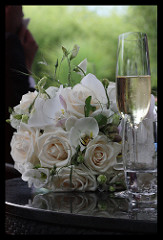

In [33]:
img 

In [35]:
img=image.load_img("/content/drive/MyDrive/ASSIGMENT-3 CNN/flowers/rose/3948347096_42261f047a_m.jpg",target_size=(64,64)) 

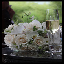

In [36]:
img

In [37]:
x=image.img_to_array(img)

In [38]:
x

array([[[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  1.,   1.,   1.],
        [  3.,   3.,   5.],
        [  0.,   0.,   0.]],

       [[  2.,   2.,   2.],
        [  0.,   0.,   0.],
        [ 16.,   6.,   5.],
        ...,
        [ 68.,  77.,  56.],
        [  2.,   0.,   3.],
        [  0.,   0.,   0.]],

       [[  3.,   0.,   0.],
        [  0.,   1.,   0.],
        [ 58.,  26.,  31.],
        ...,
        [113., 132.,  77.],
        [  1.,   0.,   2.],
        [  0.,   0.,   0.]],

       ...,

       [[  2.,   2.,   2.],
        [  0.,   0.,   0.],
        [ 21.,  17.,  16.],
        ...,
        [ 12.,  13.,  15.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  1.,   0.,   0.],
        [  3.,   1.,   2.],
        ...,
        [  1.,   1.,   1.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   1.,   0.],
        [  0.,   0.,   0.],
        [  0.,  

In [45]:
x=np.expand_dims(x,axis=0)

In [46]:
x

array([[[[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  1.,   1.,   1.],
         [  3.,   3.,   5.],
         [  0.,   0.,   0.]],

        [[  2.,   2.,   2.],
         [  0.,   0.,   0.],
         [ 16.,   6.,   5.],
         ...,
         [ 68.,  77.,  56.],
         [  2.,   0.,   3.],
         [  0.,   0.,   0.]],

        [[  3.,   0.,   0.],
         [  0.,   1.,   0.],
         [ 58.,  26.,  31.],
         ...,
         [113., 132.,  77.],
         [  1.,   0.,   2.],
         [  0.,   0.,   0.]],

        ...,

        [[  2.,   2.,   2.],
         [  0.,   0.,   0.],
         [ 21.,  17.,  16.],
         ...,
         [ 12.,  13.,  15.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  1.,   0.,   0.],
         [  3.,   1.,   2.],
         ...,
         [  1.,   1.,   1.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   1.,   0.],
       

In [47]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 74ms/step


In [48]:
y

array([2])

In [49]:
x_train.class_indices 

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [51]:
index=['daisy','dandelion','rose','sunflower','tulip'] 
index[y[0]] 

'rose'